<a href="https://colab.research.google.com/github/uhyozzy/TIL/blob/main/DeepLearning/DL1.5_%EB%AA%A8%EB%8D%B8%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터의 확인과 검증셋**

- feature에 따라 레드와인, 화이트와인 구분하기

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

df=pd.read_csv('/content/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


**X=와인 속성,y=와인분류**

In [3]:
X=df.iloc[:,0:12]
y=df.iloc[:,12]

**학습셋/테스트셋 분류**

In [5]:
X_train, X_test, y_train,y_test = train_test_split(X, y , test_size=0.2, shuffle=True)

**모델구조 설정**

In [6]:
model=Sequential()

model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


**모델 컴파일 및 실행**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X, y, epochs=50, batch_size=500, validation_split=0.25) #0.8*0.25=0.2

**테스트 결과 출력**

In [10]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9569
Test accuracy:  0.9569230675697327


# **2.모델 업데이트하기**

**모델의 저장 및 실행**

In [ ]:
# 저장조건 설정
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="./model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 실행
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0,
                  callbacks=[checkpointer])

- **`modelpath="./model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"`**:
  - 모델이 저장될 경로를 지정합니다.
    - {epoch:02d}는 현재 에포크 번호를 두 자리 숫자로 표현
    - {val_accuracy:.4f}는 검증 데이터에 대한 정확도를 소수점 아래 4자리까지 표현하는 것을 의미합니다. 이렇게 설정함으로써 학습이 진행되면서 각 에포크마다 정확도가 높아지는 모델들이 저장될 것입니다.

- **`checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)`**: ModelCheckpoint 객체를 생성합니다.
  - 이때, filepath에는 모델의 저장 경로가 설정되고,
  - verbose는 저장 시 로그 메시지를 얼마나 자세하게 출력할지를 결정합니다. verbose=1이면 모델이 저장될 때마다 로그 메시지가 출력됩니다.

- **`history=model.fit(...)`**: 이 부분은 모델을 학습시키는 부분
  - fit 메서드를 사용하여 주어진 데이터를 사용하여 모델을 학습합니다.
  - X_train은 입력 데이터, y_train은 해당 입력 데이터에 대한 라벨(타깃) 데이터를 나타냅니다.

    - **`epochs=50`**: 전체 데이터셋을 몇 번 반복해서 학습할지를 지정합니다. 에포크(epoch)는 학습 데이터를 한 번 전체로 훑는 것을 의미합니다. 여기서는 50 에포크 동안 학습을 진행할 것입니다.
    - **`batch_size=500`**: 한 번의 에포크에서 사용할 미니배치 크기를 설정합니다. 미니배치는 전체 데이터를 작은 단위로 나누어 학습하는 방식으로, 메모리를 효율적으로 사용하면서도 학습 과정을 가속화하는 데 도움이 됩니다. 여기서는 500개의 데이터로 구성된 미니배치를 사용합니다.
    - **`validation_split=0.25`**: 학습 데이터 중에서 검증 데이터로 사용할 비율을 지정합니다. 이 경우 전체 학습 데이터의 25%가 검증 데이터로 사용됩니다.
    - **`verbose=0`**: 학습 과정에서의 출력 메시지를 지정합니다. verbose=0이면 출력이 없고, verbose=1이면 진행 상황을 보여주는 로그 메시지가 출력됩니다.
    - **`callbacks=[checkpointer]`**: 이 부분은 앞서 설정한 ModelCheckpoint 콜백을 모델 학습에 적용하는 부분입니다. 즉, 매 에포크마다 모델의 정확도를 확인하고, 지정된 경로에 모델을 저장합니다.

**테스트 결과 출력**

In [17]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9762
Test accuracy:  0.9761538505554199


# **3. 그래프로 과적합 학습하기**

**그래프 확인을 위한 긴 학습**

In [ ]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

**history에 저장된 학습결과 확인**

In [20]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.090046,0.971773,0.095938,0.970000
1,0.089561,0.972800,0.095537,0.970000
2,0.088798,0.971003,0.095096,0.970769
3,0.088164,0.972286,0.094602,0.971538
4,0.087951,0.972286,0.095667,0.972308
...,...,...,...,...
1995,0.029644,0.990762,0.047999,0.991538
1996,0.028971,0.992045,0.047559,0.991538
1997,0.028847,0.991789,0.047554,0.993077
1998,0.029511,0.991019,0.047996,0.992308


**y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장**

In [21]:
y_vloss=hist_df['val_loss']

**y_loss에 학습셋의 오차를 저장**

In [22]:
y_loss=hist_df['loss']

**x값을 지정**
- 테스트셋(검증셋)의 오차를 빨간색으로 표시
- 학습셋의 오차를 파란색으로 표시

<function matplotlib.pyplot.show(close=None, block=None)>

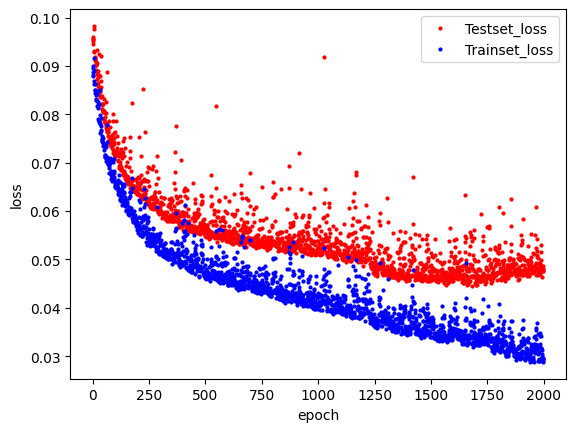

In [23]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

# **4. 학습의 자동중단**
**학습이 언제 자동중단될지 설정**

- **`EarlyStopping`**:
  - EarlyStopping은 모델 학습 중에 일정 조건을 모니터링하고, 조건이 충족되면 학습을 중지하는 콜백입니다.

- **`monitor='val_loss'`**:
  - monitor 매개변수는 어떤 지표(metric)를 모니터링할지를 지정합니다. 이 경우 'val_loss'를 지정하였으므로, 검증 데이터(validation data)에 대한 손실(loss)을 모니터링하게 됩니다. 손실값이 감소하는지를 확인하여 조기 종료를 결정하게 됩니다.

- **`patience=20`**:
 - patience 매개변수는 조기 종료를 결정하기 위해 얼마나 기다릴지를 지정합니다. 여기서는 20으로 설정되어 있으므로, 검증 손실값이 20 에포크 동안 감소하지 않으면 학습을 종료합니다.

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)
# val_loss이 줄어드는 상태를 계속 모니터링
# 20번 반복한 뒤 중단

**최적화 모델이 저장될 폴더와 모델이름 설정**

In [26]:
modelpath='./model/bestmodel.hdf5'
# hdf5=Hierachical Data Format(메타데이터를 그룹화하여 저장)

**최적화 모델을 업데이트하고 저장**

In [28]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

**모델 실행**

In [ ]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1,
                  callbacks=[early_stopping_callback, checkpointer])

**테스트 결과 출력**

In [30]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9908
Test accuracy:  0.9907692074775696
